In [110]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [111]:
df = pd.read_csv('datasets/customer_segmentation.csv')
df.drop('Customer Id',axis=1,inplace=True)
df.drop('Address',axis=1,inplace=True)
df.drop('Defaulted',axis=1,inplace=True)
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,6.3
1,47,1,26,100,4.582,8.218,12.8
2,33,2,10,57,6.111,5.802,20.9
3,29,2,4,19,0.681,0.516,6.3
4,47,1,31,253,9.308,8.908,7.2


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              850 non-null    int64  
 1   Edu              850 non-null    int64  
 2   Years Employed   850 non-null    int64  
 3   Income           850 non-null    int64  
 4   Card Debt        850 non-null    float64
 5   Other Debt       850 non-null    float64
 6   DebtIncomeRatio  850 non-null    float64
dtypes: float64(3), int64(4)
memory usage: 46.6 KB


In [113]:
df.isna().sum()

Age                0
Edu                0
Years Employed     0
Income             0
Card Debt          0
Other Debt         0
DebtIncomeRatio    0
dtype: int64

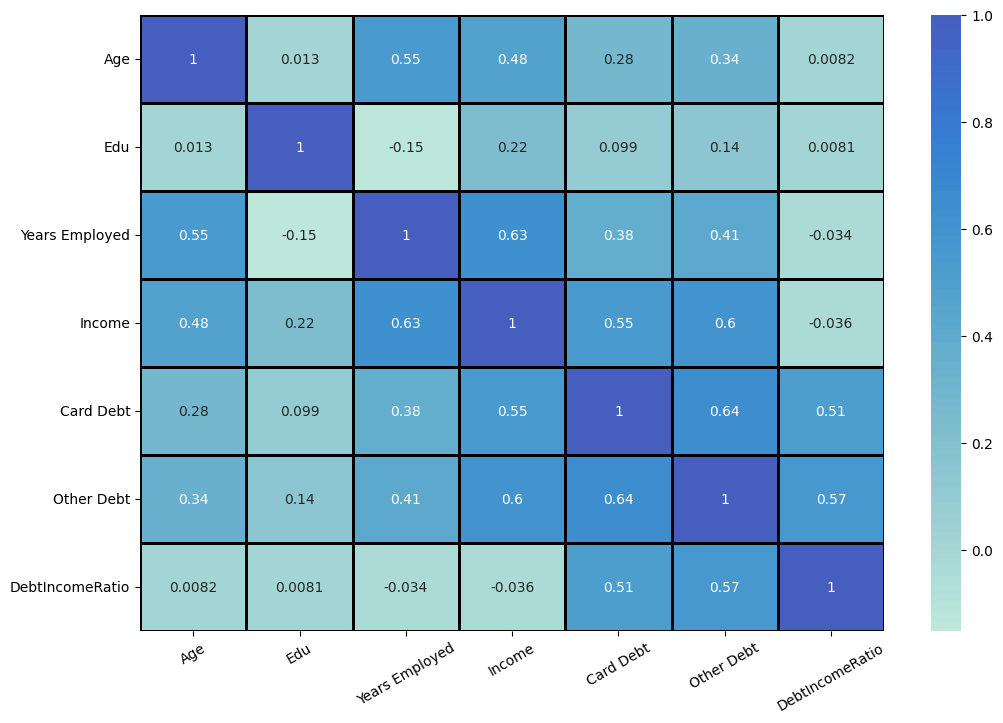

In [114]:
mn = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(mn,annot=True,linewidths=2,linecolor='Black',center=2)
plt.xticks(rotation=30)
plt.show()

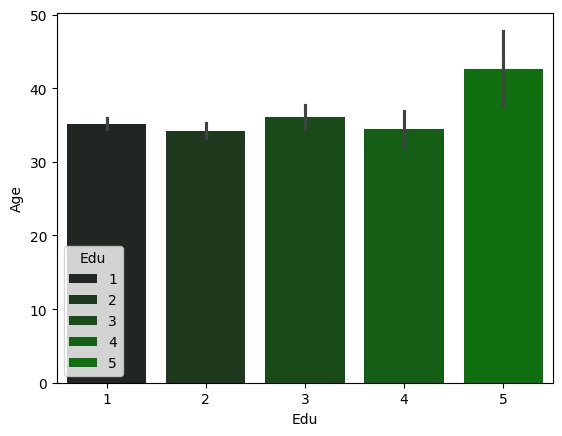

In [115]:
sns.barplot(df,x='Edu',y='Age',hue='Edu',palette='dark:Green')
plt.show()

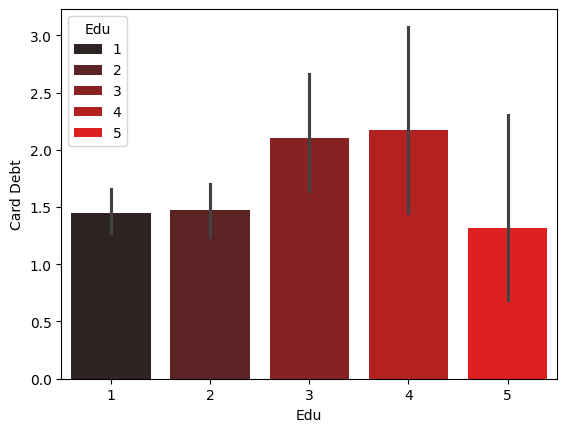

In [116]:
sns.barplot(df,x='Edu',y='Card Debt',hue='Edu',palette='dark:Red')
plt.show()

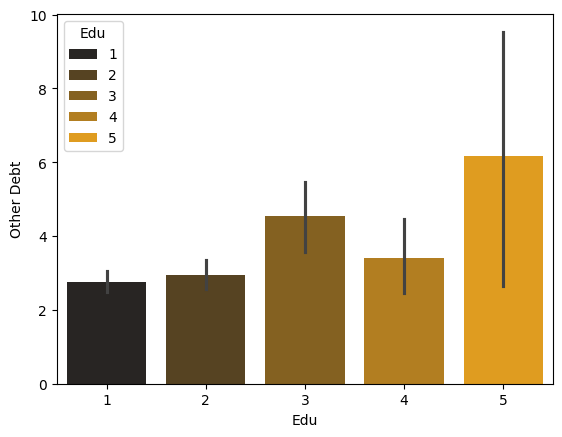

In [117]:
sns.barplot(df,x='Edu',y='Other Debt',hue='Edu',palette='dark:Orange')
plt.show()

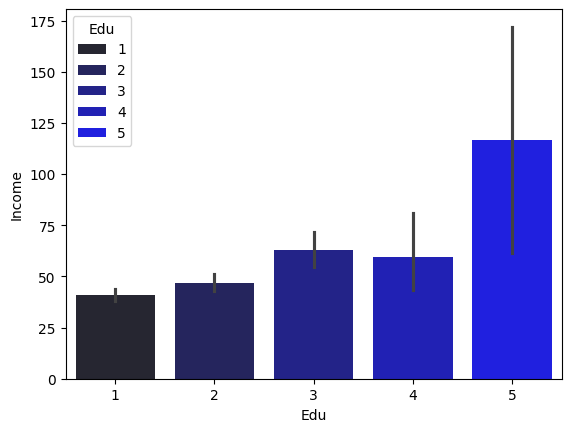

In [118]:
sns.barplot(data=df,x='Edu',y='Income',hue='Edu',palette='dark:Blue')
plt.show()

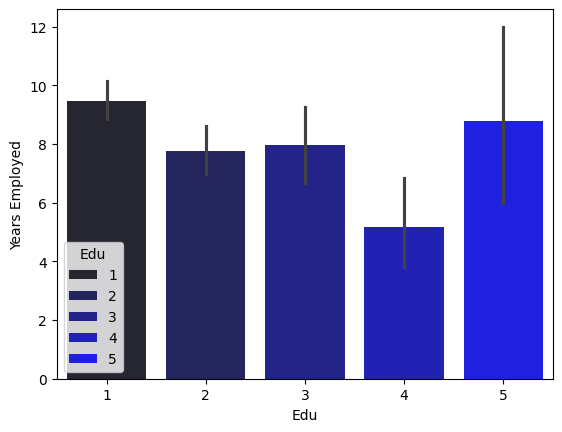

In [119]:
sns.barplot(data=df,x='Edu',y='Years Employed',hue='Edu',palette='dark:Blue')
plt.show()

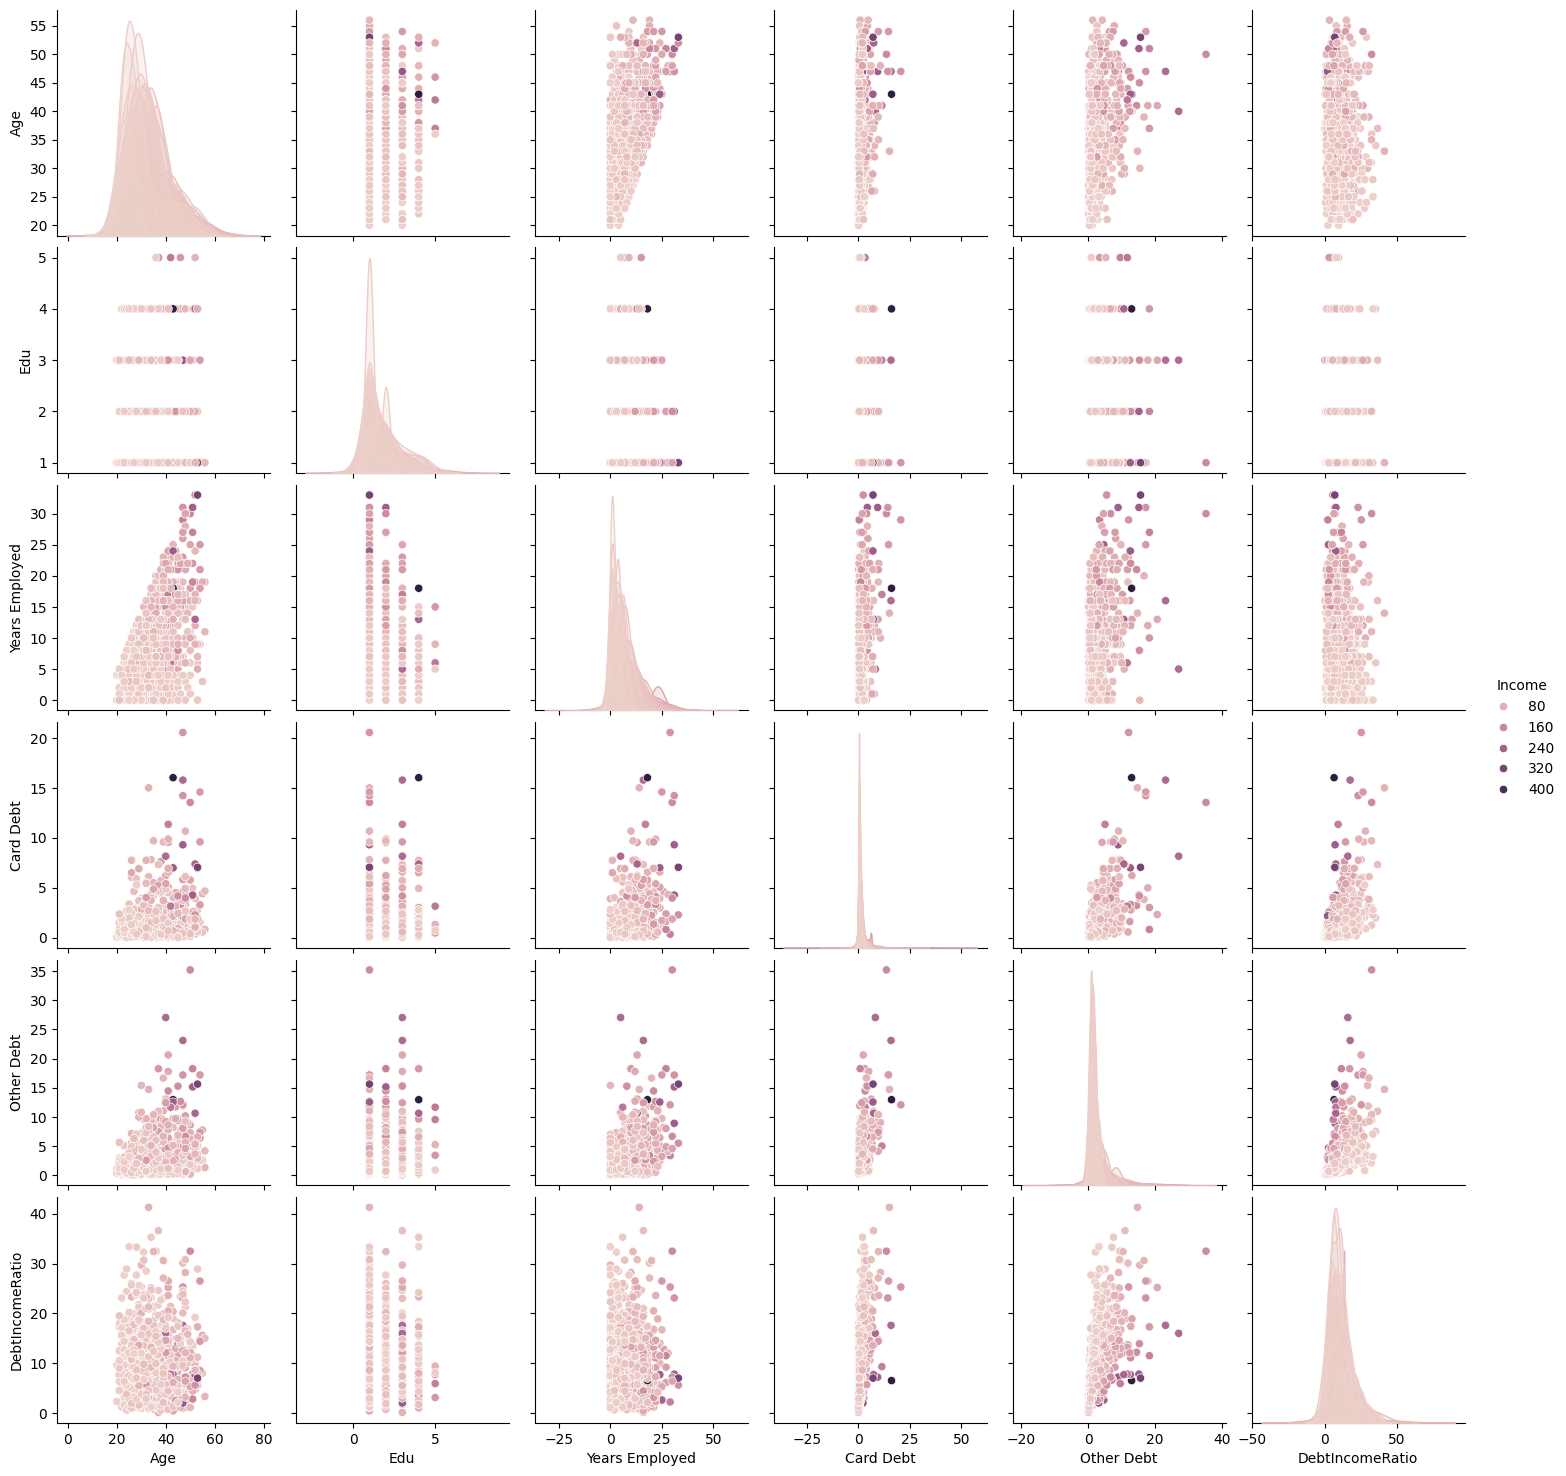

In [120]:
sns.pairplot(df,hue='Income')
plt.show()

In [123]:
X = df.drop('Income',axis=1)
y = df['Income'].values

In [180]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.model_selection import cross_val_score,train_test_split

In [127]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=12)

In [138]:
print("Train dataset")
print("X = ",X_train.shape)
print("Y = ",Y_train.shape)

Train dataset
X =  (680, 6)
Y =  (680,)


In [130]:
print("Test dataset")
print("X = ",X_test.shape)
print("Y = ",Y_test.shape)

Test dataset
X =  (170, 6)
Y =  (170,)


In [172]:
def use_model(model,X_train:np.array,Y_train:np.array,X_test:np.array,Y_test:np.array,cv:int):
  model.fit(X_train,Y_train)
  pred = model.predict(X_test)
  print("Mean absolute error = ",mean_absolute_error(Y_test,pred))
  print("R2 score = ", r2_score(Y_test,pred))
  print(f"Mean cross val score (cv={cv}) = ",cross_val_score(model,X_test,Y_test,cv=5).mean())
  print(f"Std cross val score (cv={cv}) = ",cross_val_score(model,X_test,Y_test,cv=5).std())

In [173]:
lr = LinearRegression()
use_model(lr,X_train,Y_train,X_test,Y_test,cv=5)

Mean absolute error =  11.871280958072841
R2 score =  0.7357582550207811
Mean cross val score (cv=5) =  0.5885415784080263
Std cross val score (cv=5) =  0.20685330471001034


In [160]:
Gr = GradientBoostingRegressor()
use_model(Gr,X_train,Y_train,X_test,Y_test,cv=5)

Mean absolute error =  11.871280958072841
R2 score =  0.7357582550207811
Mean cross val score (cv=5) =  0.5885415784080263
Std cross val score (cv=5) =  0.20685330471001034


In [181]:
ad = AdaBoostRegressor()
use_model(ad,X_train,Y_train,X_test,Y_test,cv=5)

Mean absolute error =  23.74894131225465
R2 score =  0.4980096957870165
Mean cross val score (cv=5) =  0.5058623600269637
Std cross val score (cv=5) =  0.10793430376259971
